Para esta tarefa, escolhi a base de dados "Most Subscribed 1000 YouTube Channels" disponível no Kaggle.

https://www.kaggle.com/datasets/themrityunjaypathak/most-subscribed-1000-youtube-channels

# Carregando a base de dados:
Para começar, vou carregar a base de dados usando a biblioteca pandas e verificar suas primeiras linhas usando a função head().

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv("topSubscribed.csv")
df = df.replace(',', '', regex=True)
df.head()

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
0,1,T-Series,234000000,212900271553,18515,Music,2006
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,152000000,149084178448,846,Education,2006
3,4,SET India,150000000,137828094104,103200,Shows,2006
4,5,MrBeast,128000000,21549128785,733,Entertainment,2012


# Verificando a estrutura da base de dados:
Agora, vou verificar as informações sobre a estrutura da base de dados, como o número de linhas e colunas, o tipo de dados em cada coluna e a presença de valores nulos.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             1000 non-null   int64 
 1   Youtube Channel  1000 non-null   object
 2   Subscribers      1000 non-null   object
 3   Video Views      1000 non-null   object
 4   Video Count      1000 non-null   object
 5   Category         1000 non-null   object
 6   Started          1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [3]:
df = df.astype({'Subscribers':'int64', 'Video Views':'int64', 'Video Views':'int64'})

# Verificando estatísticas básicas:
Para ter uma ideia das estatísticas básicas dos dados, como média, desvio padrão, mínimo e máximo, vou usar a função describe().

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1000.00,500.50,288.82,1.00,250.75,500.50,750.25,1000.00
Subscribers,1000.00,21581400.00,16625563.55,11400000.00,13400000.00,16600000.00,23200000.00,234000000.00
Video Views,1000.00,9994912409.73,13005457456.50,0.00,3871469970.25,6723360159.00,12230520916.75,212900271553.00
Started,1000.00,2012.59,4.11,1970.00,2010.00,2013.00,2015.00,2021.00


# Started em 1970??

In [5]:
df[df['Started']==1970]

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
99,100,YouTube,35200000,2980922779,620,News & Politics,1970


Sendo o próprio canal do youtube, coloquei sua data de fundação 2005.

In [6]:
df.loc[df["Started"] == 1970, "Started"] = 2005

# Zero Video Views??

In [7]:
df[df['Video Views']==0]

,Rank,Youtube Channel,Subscribers,Video Views,Video Count,Category,Started
1,2,YouTube Movies,161000000,0,0,Film & Animation,2015
5,6,Music,118000000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
9,10,Gaming,93300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
17,18,Sports,75100000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
91,92,News,36300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
154,155,Popular on YouTube,29300000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
357,358,Minecraft - Topic,19500000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2013
550,551,Live,15700000,0,0,https://us.youtubers.me/global/all/top-1000-mo...,2015
971,972,Machinima,11600000,0,0,Film & Animation,2006


In [8]:
# Renomeando a categoria http
df.loc[df["Category"] == 'https://us.youtubers.me/global/all/top-1000-most_subscribed-youtube-channels', "Category"] = 'Sem Cartegoria'

Vou deixar por hora essas linhas, pelo quantidade relevante de Subscribers. Talvez outros canais estejam dentro desses "Canal Categoria"

# Plots

In [9]:
def plot_histplot(df, x, bins, titulo, xlabel, ylabel, kde=False):
    # Define o tamanho da figura
    plt.figure(figsize=(13, 3))

    # Plota o histograma usando a biblioteca Seaborn
    sns.histplot(data=df, x=x, bins=bins, linewidth=1.2, kde = kde)

    # Adiciona um título ao gráfico
    plt.title(titulo, fontsize=16)

    # Adiciona um rótulo ao eixo x e y
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=90)

    # Adiciona grades ao fundo do gráfico
    plt.grid(alpha=0.2)

    # Ajusta o tamanho das fontes das legendas
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Remove os eixos superior e direito
    sns.despine()

    # Mostra o gráfico
    return plt.show()

In [10]:
def plot_barplot(df, x, y, titulo, xlabel, ylabel):
    # Define o tamanho da figura
    plt.figure(figsize=(13, 3))

    # Plota o histograma usando a biblioteca Seaborn
    sns.barplot(data = df, x=x, y=y, palette="magma")
    # Adiciona um título ao gráfico
    plt.title(titulo, fontsize=16)

    # Adiciona um rótulo ao eixo x e y
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Adiciona grades ao fundo do gráfico
    plt.grid(alpha=0.2)

    # Ajusta o tamanho das fontes das legendas
    plt.xticks(fontsize=12)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=12)

    # Remove os eixos superior e direito
    sns.despine()

    # Mostra o gráfico
    return plt.show()

In [11]:
def plot_boxplot(df, x, y, titulo, xlabel, ylabel):
    # Define o tamanho da figura
    plt.figure(figsize=(13, 3))

    # Plota o histograma usando a biblioteca Seaborn
    sns.boxplot(data = df, x=x, y=y, palette="magma")
    # Adiciona um título ao gráfico
    plt.title(titulo, fontsize=16)

    # Adiciona um rótulo ao eixo x e y
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Adiciona grades ao fundo do gráfico
    plt.grid(alpha=0.2)

    # Ajusta o tamanho das fontes das legendas
    plt.xticks(fontsize=12)
    plt.xticks(rotation=90)
    plt.yticks(fontsize=12)

    # Remove os eixos superior e direito
    sns.despine()

    # Mostra o gráfico
    return plt.show()

## Contagem de Categorias

In [12]:
df.value_counts('Category')

Category
Entertainment            238
Music                    217
People & Blogs           132
Gaming                    94
Comedy                    68
Film & Animation          50
Education                 45
Howto & Style             43
Sem Cartegoria            30
News & Politics           27
Science & Technology      18
Shows                     14
Sports                    10
Pets & Animals             6
Nonprofits & Activism      2
Trailers                   2
Movies                     2
Autos & Vehicles           1
Travel & Events            1
dtype: int64

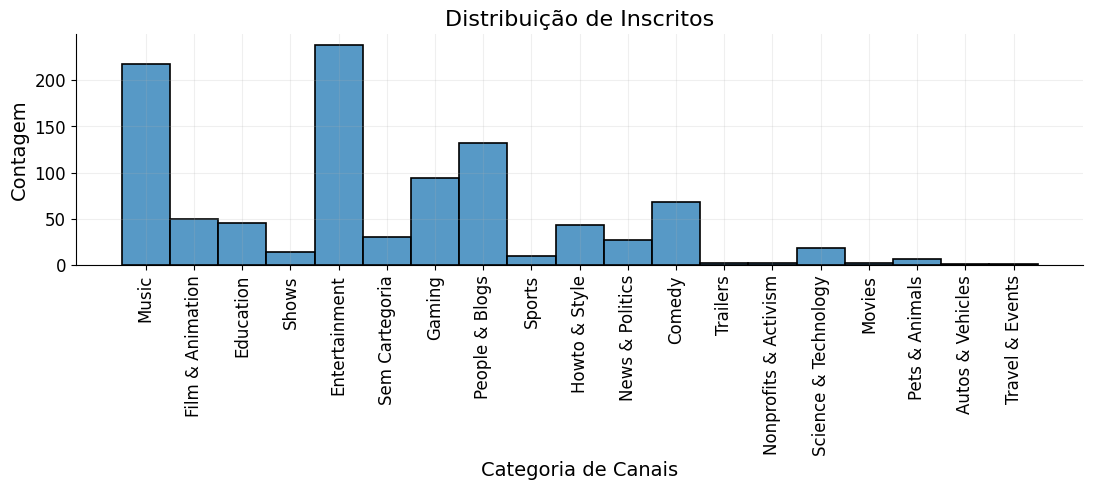

In [13]:
plot_histplot(df, 'Category', 100, 'Distribuição de Inscritos', 'Categoria de Canais', 'Contagem')

## Distribuição de Inscritos

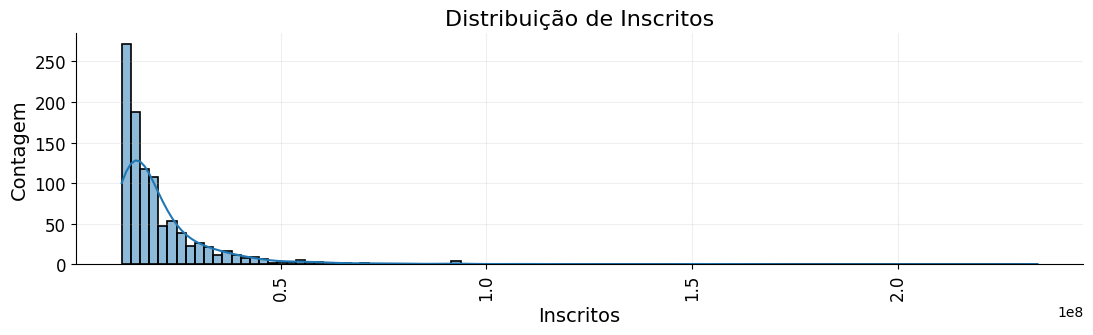

In [14]:
plot_histplot(df, 'Subscribers', 100, 'Distribuição de Inscritos', 'Inscritos', 'Contagem', True)# Define o tamanho da figura

## Contagem de Inscritos por Categoria

In [15]:
df_cat = df.groupby('Category').sum()
df_cat.drop(columns=['Rank', 'Started'], inplace=True)
df_cat.reset_index(inplace=True)
df_cat = df_cat.sort_values(by = 'Subscribers', ascending=False).reset_index(drop=True)
df_cat

C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_19900\310806937.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cat = df.groupby('Category').sum()


,Category,Subscribers,Video Views
0,Music,5224800000,3058929450985
1,Entertainment,4768200000,2218980613268
2,People & Blogs,2558500000,1108132436989
3,Gaming,1873900000,671374062722
4,Film & Animation,1275200000,518043392749
5,Comedy,1256400000,424592260530
6,Education,1133600000,638114991185
7,Sem Cartegoria,793400000,179830796038
8,Howto & Style,782300000,195253359938
9,News & Politics,519300000,252717799570


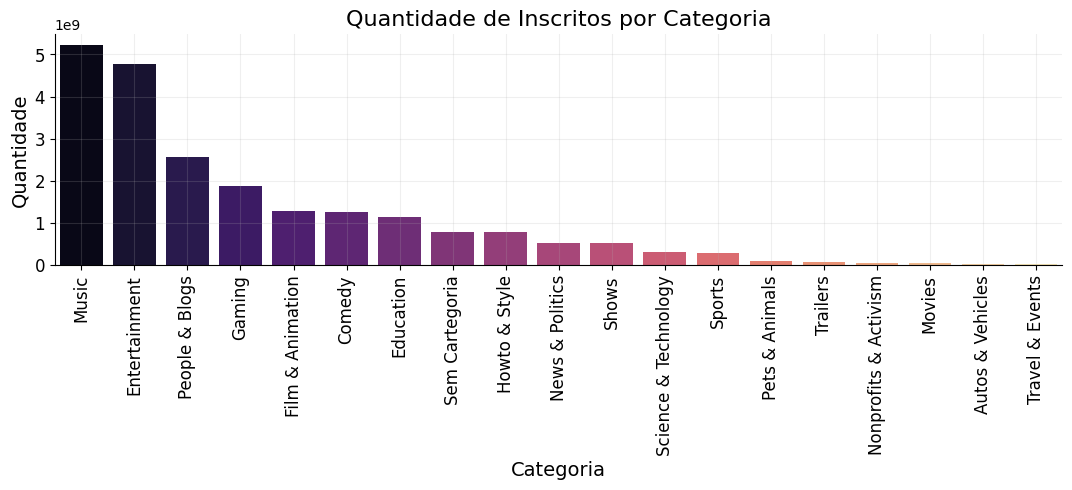

In [16]:
plot_barplot(df_cat, 'Category', 'Subscribers', 'Quantidade de Inscritos por Categoria', 'Categoria', 'Quantidade')

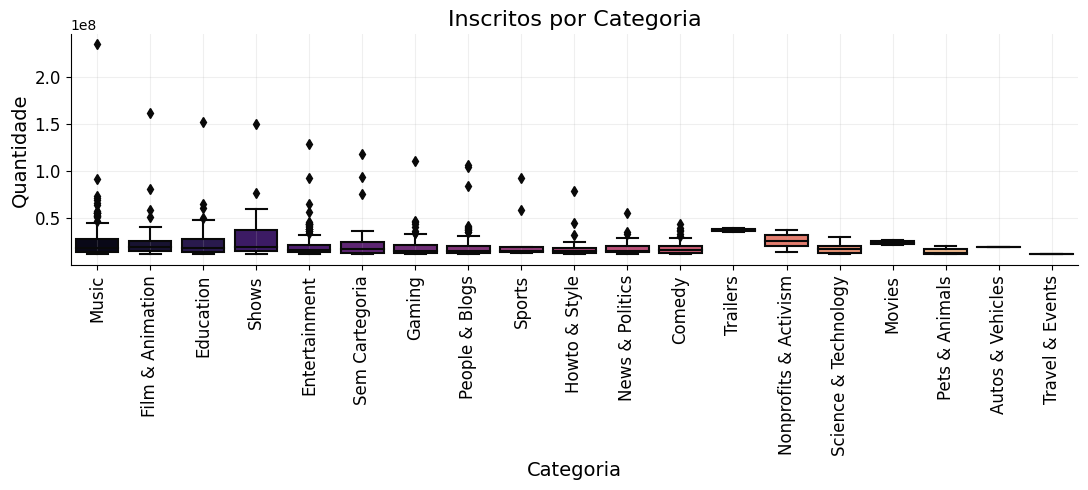

In [17]:
plot_boxplot(df, "Category", "Subscribers", 'Inscritos por Categoria', 'Categoria', 'Quantidade')

## Boxplot distribuição de inscritos

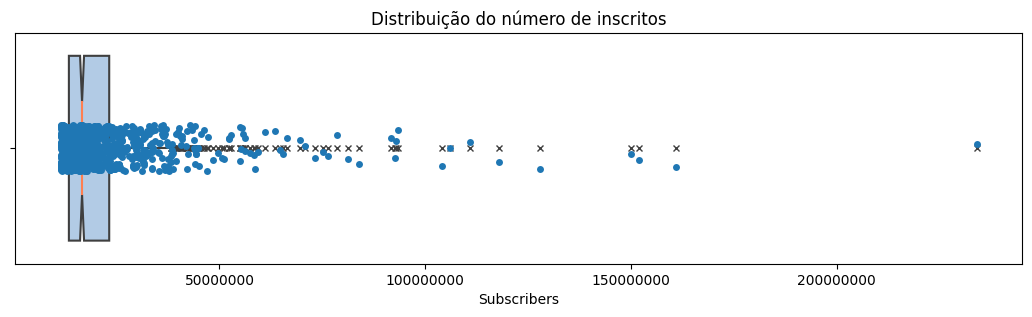

In [18]:
plt.figure(figsize=(13,3))
plt.title("Distribuição do número de inscritos")
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['Subscribers'], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
sns.stripplot(x=df['Subscribers'])
plt.show()

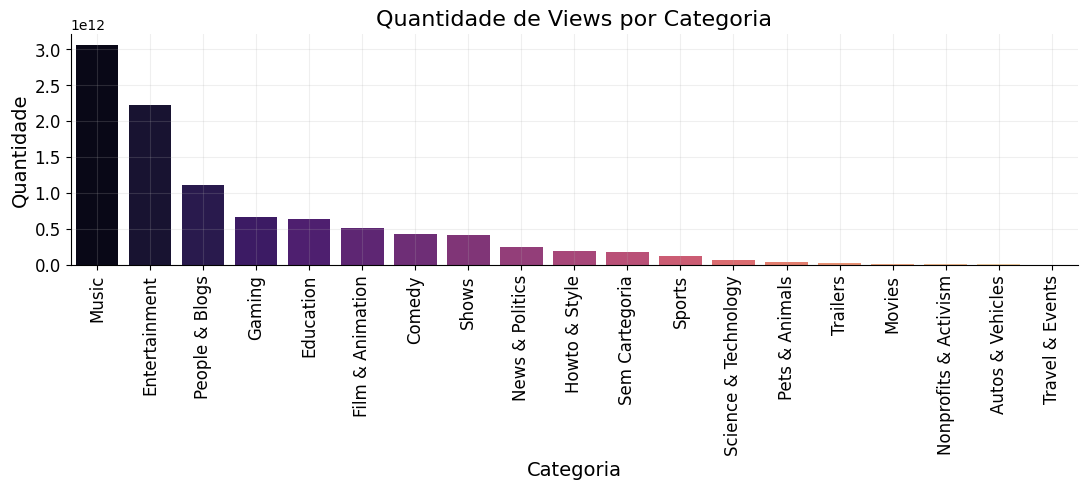

In [19]:
df_cat = df_cat.sort_values(by = 'Video Views', ascending=False)

plot_barplot(df_cat, 'Category', 'Video Views', 'Quantidade de Views por Categoria', 'Categoria', 'Quantidade')

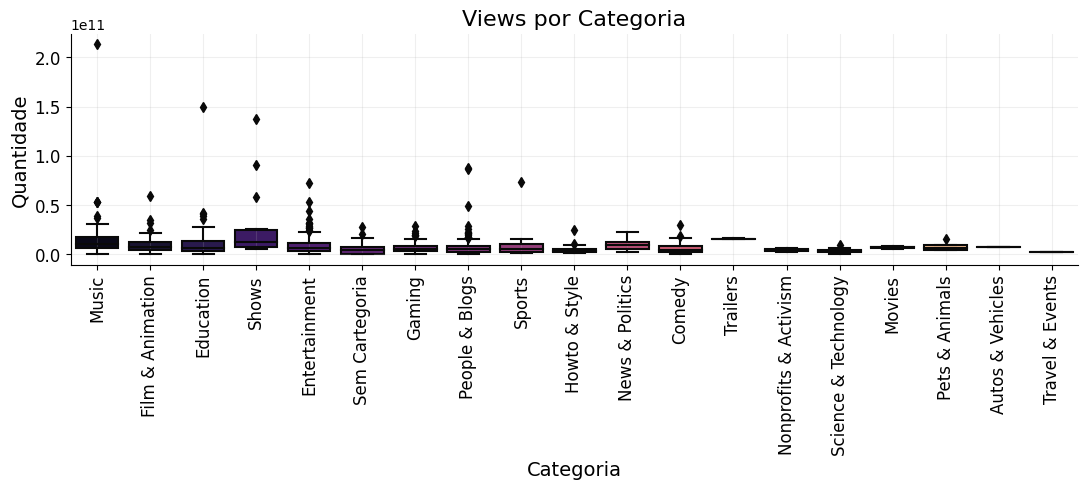

In [20]:
plot_boxplot(df, "Category", "Video Views", 'Views por Categoria', 'Categoria', 'Quantidade')

## Distribuição de canais pelos anos

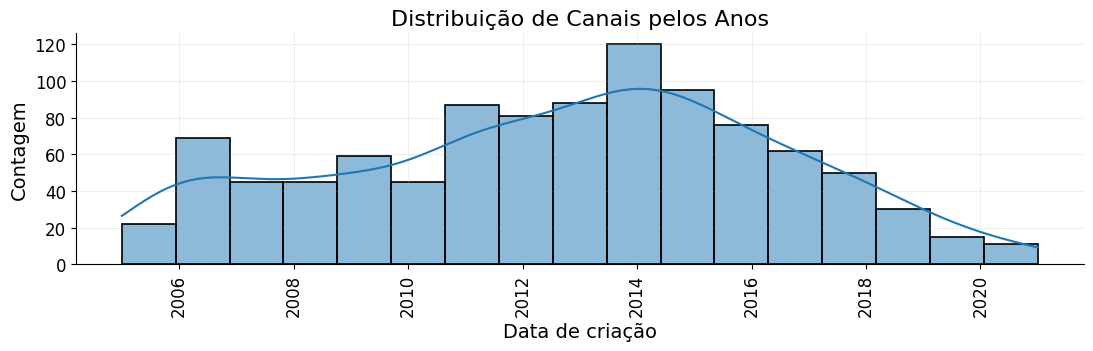

In [21]:
plot_histplot(df, 'Started', len(df.Started.unique()), 'Distribuição de Canais pelos Anos', 'Data de criação', 'Contagem', True)

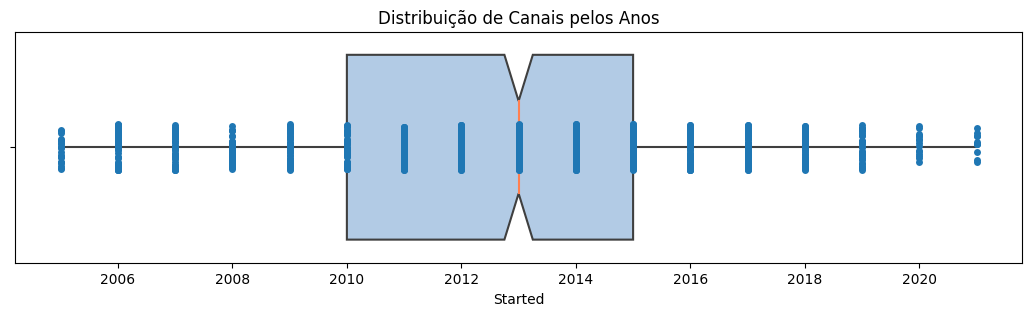

In [22]:
plt.figure(figsize=(13, 3))
plt.title("Distribuição de Canais pelos Anos")
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df['Started'], notch=True, showcaps=False, flierprops={"marker": "x"}, boxprops={"facecolor": (.4, .6, .8, .5)}, medianprops={"color": "coral"})
sns.stripplot(x=df['Started'])
plt.show()

Canais criados entre 2013 e 2015 foram os que mais se cresceram. Esse período também representa 25% da criação dos canais top1000.

Algumas análises/conclusões:

- A base de dados possui 1000 linhas e 7 colunas.
- Outliers

# Entrega 2

In [36]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# carregar o conjunto de dados
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67,22.40
502,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
503,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
504,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00


In [37]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


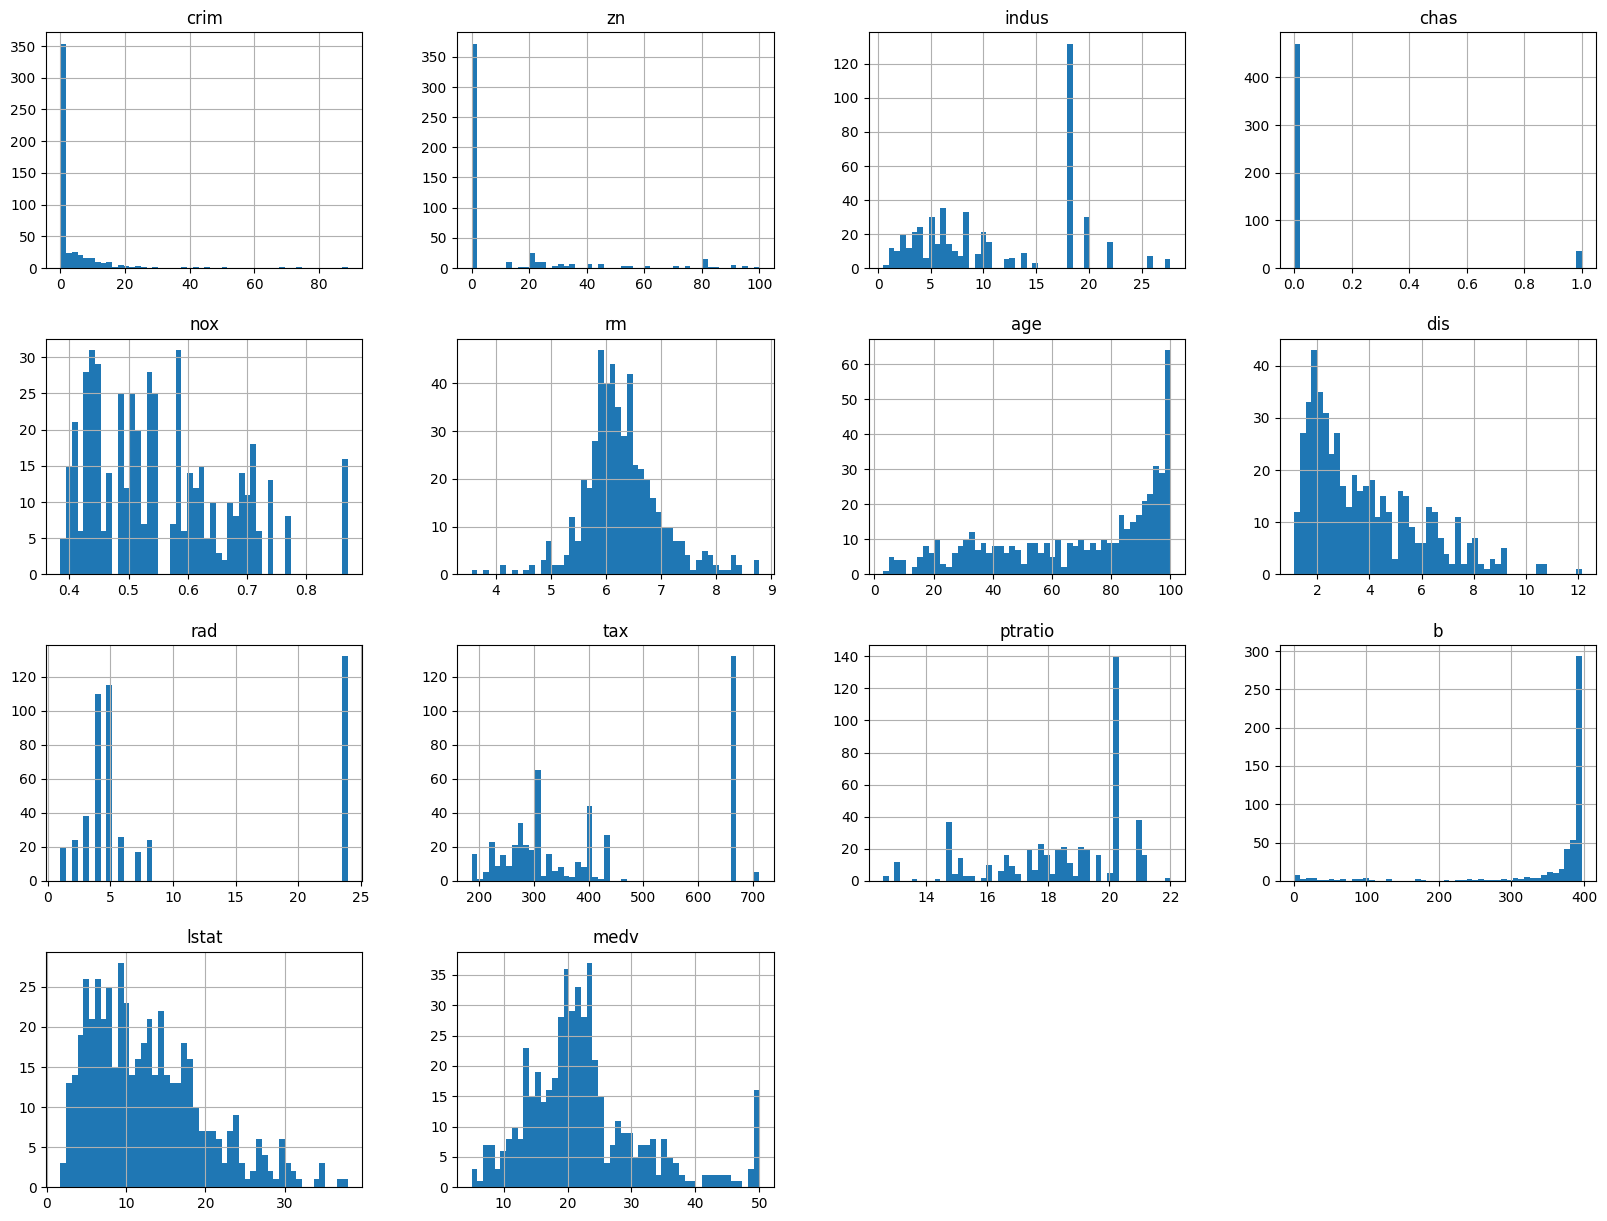

In [39]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

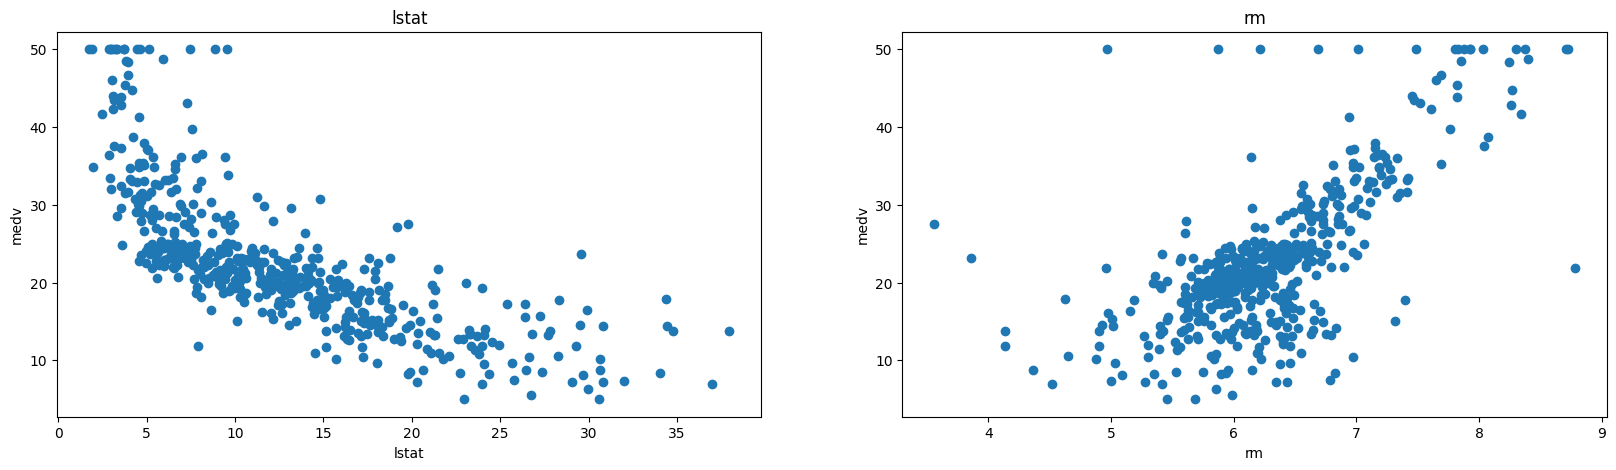

In [42]:
plt.figure(figsize=(20, 5))

features = ['lstat', 'rm']
target = df['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('medv')

plt.show()


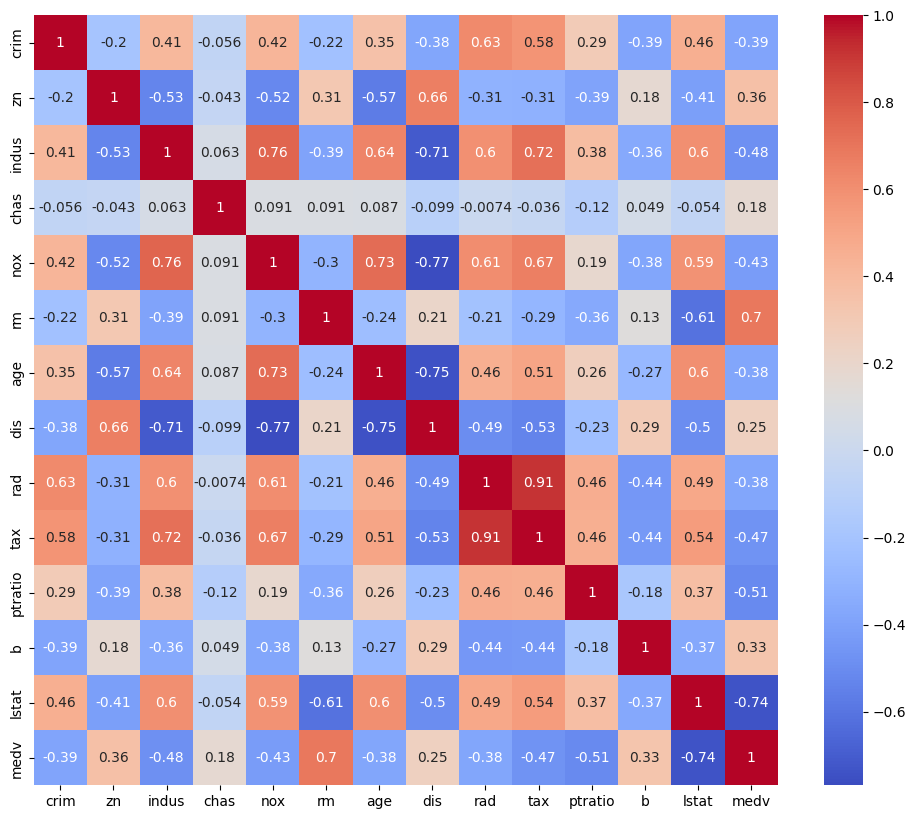

In [43]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [45]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [ ]:

# separar os dados em conjunto de treinamento e teste
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# instanciar e ajustar o modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# fazer previsões nos dados de teste
y_pred = regressor.predict(X_test)

# avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R²:", r2)
